<a href="https://colab.research.google.com/github/Ibtasam-98/machine-learning-algorithms/blob/main/linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Linear Regression


In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

print("Libraries imported successfully!")

Libraries imported successfully!


# Loading Dataset and Exploration

We'll load the Diabetes dataset, which is a built-in dataset in scikit-learn, and take a quick look at its structure.



In [3]:
diabetes = load_diabetes(as_frame=True)

# Separate the features (input variables, X) from the target (output variable, y)
X = diabetes.data
y = diabetes.target

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

print("\n--- First 5 rows of Features (X) ---")
print(X.head()) # Display the first 5 rows of the feature DataFrame
print("\n--- First 5 rows of Target (y) ---")
print(y.head()) # Display the first 5 values of the target Series


Shape of X (features): (442, 10)
Shape of y (target): (442,)

--- First 5 rows of Features (X) ---
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

--- First 5 rows of Target (y) ---
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


#Visualize one feature


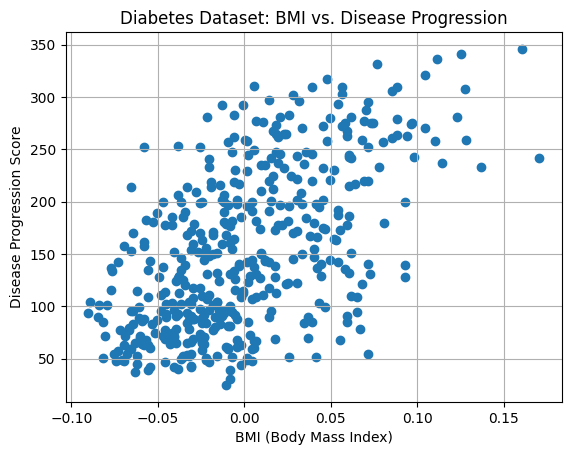

In [4]:
plt.scatter(X['bmi'], y)
plt.title("Diabetes Dataset: BMI vs. Disease Progression")
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Disease Progression Score")
plt.grid(True)
plt.show()

**Explanation**

* load_diabetes() fetches the dataset.
* X holds the input features (like age, BMI, blood pressure, etc.)
y holds the target variable (a quantitative measure of disease progression).
* X.shape and y.shape show the number of samples and features.
* X.head() and y.head() print a preview of the data.
* The scatter plot helps visualize the relationship between one feature and the target, which is good practice for initial data understanding.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("\n--- Training and Test Data Shapes ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")



--- Training and Test Data Shapes ---
X_train shape: (331, 10)
y_train shape: (331,)
X_test shape: (111, 10)
y_test shape: (111,)
